In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv.')

# Q4 Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [3]:
#Looking at top 5 rows of dataframe
gdp_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN
...,...,...,...,...
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN


# Q5 How many rows and columns are in `gdp_df`? What are the data types of each column?

In [4]:
#Rows = 7662, Columns = 4
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7662 non-null   object 
 1   Year             7662 non-null   int64  
 2   Value            7662 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 239.6+ KB


# Q6 Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [5]:
gdp_df_less = gdp_df.drop('Value Footnotes', axis=1)

In [6]:
gdp_df_less

,Country or Area,Year,Value
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111
...,...,...,...
7657,Zimbabwe,1994,2670.106615
7658,Zimbabwe,1993,2458.783255
7659,Zimbabwe,1992,2468.278257
7660,Zimbabwe,1991,2781.787843


In [7]:
gdp_df_clean = gdp_df_less.rename(columns={'Country or Area': 'Country', 'Value': 'GDP_Per_Capita'})

In [8]:
gdp_df_clean

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111
...,...,...,...
7657,Zimbabwe,1994,2670.106615
7658,Zimbabwe,1993,2458.783255
7659,Zimbabwe,1992,2468.278257
7660,Zimbabwe,1991,2781.787843


# Q7 How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice? 

In [9]:
gdp_df_clean['Year'].agg(['min', 'max'])

min    1990
max    2022
Name: Year, dtype: int64

gdp_df_clean['Country'].groupby(value_counts(sort=True))

In [10]:
gdp_df_clean.sort_values('Year', ascending=False)

,Country,Year,GDP_Per_Capita
4113,Lower middle income,2022,7127.774670
1704,Dominica,2022,11495.130423
1314,Chile,2022,25886.121356
3995,Libya,2022,19796.587498
4921,Nauru,2022,11109.803012
...,...,...,...
1627,Czechia,1990,23585.181494
1660,Dem. Rep. Congo,1990,1750.169739
6412,Spain,1990,27543.221532
1693,Denmark,1990,39027.978737


n = 0
m = 0
for year_count in countries_year_count['count']:
    if year_count == num_years:
        n += 1
    else:
        m += 1
print(str(n) + ' have data for all years')
print(str(m) + ' do not have data for all years')

In [11]:
gdp_df_clean['Year'].agg(['min', 'max'])
num_years = gdp_df_clean['Year'].max() +1  - gdp_df_clean['Year'].min()
print('Total number of years: ' + str(num_years))

Total number of years: 33


In [12]:
countries_year_count = gdp_df_clean['Country'].value_counts().reset_index()

In [13]:
countries_all_years = pd.array(countries_year_count[countries_year_count['count'] == num_years]['Country'])
countries_missing_years = pd.array(countries_year_count[countries_year_count['count'] != num_years]['Country'])

In [14]:
len(countries_all_years)

202

In [15]:
len(countries_missing_years)

40

In [16]:
countries_missing_years

<PandasArray>
[                  'Hungary',                   'Lebanon',
                     'Aruba',                     'Tonga',
                    'Bhutan',           'Slovak Republic',
                    'Kuwait',              'Turkmenistan',
                  'Cambodia',        'West Bank and Gaza',
    'Bosnia and Herzegovina',                    'Latvia',
                    'Israel',                   'Estonia',
                    'Serbia',                 'Lithuania',
                   'Iceland',                   'Moldova',
                  'Maldives',                   'Croatia',
                  'Slovenia',              'Small states',
                'Montenegro',                'San Marino',
                     'Libya',               'Timor-Leste',
                   'Liberia',        'Other small states',
                     'Qatar',                     'Palau',
                  'CuraÃ§ao',   'SÃ£o TomÃ© and Principe',
               'Afghanistan',             

# Q8 In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

In [17]:
gdp_df_clean

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111
...,...,...,...
7657,Zimbabwe,1994,2670.106615
7658,Zimbabwe,1993,2458.783255
7659,Zimbabwe,1992,2468.278257
7660,Zimbabwe,1991,2781.787843


C:\Users\timot\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


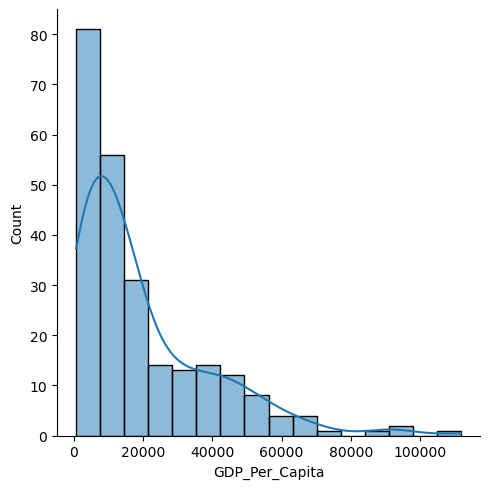

In [18]:
gdp_2020 = gdp_df_clean[gdp_df_clean['Year'] == 2020]
sns.displot( data=gdp_2020["GDP_Per_Capita"], kde=True )

<Axes: xlabel='GDP_Per_Capita', ylabel='Density'>

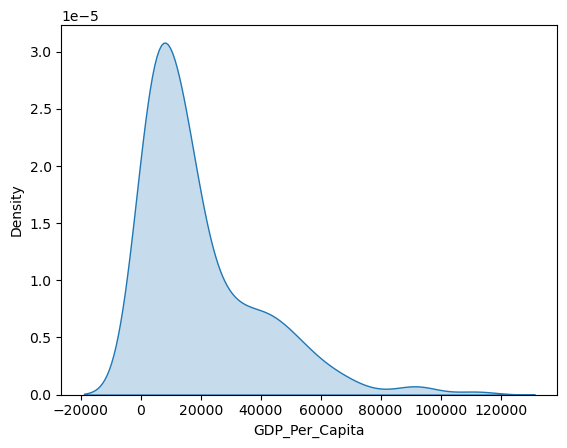

In [19]:
sns.kdeplot(gdp_2020['GDP_Per_Capita'], fill=True)

<Axes: ylabel='GDP_Per_Capita'>

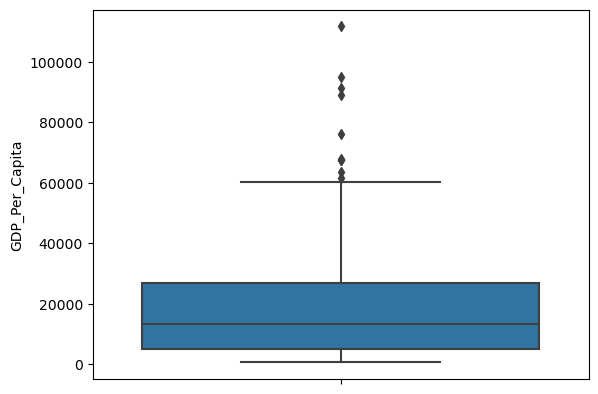

In [20]:
sns.boxplot( y=gdp_2020["GDP_Per_Capita"])

<Axes: ylabel='GDP_Per_Capita'>

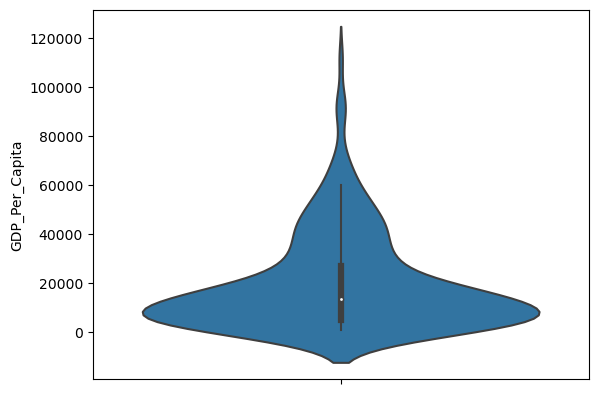

In [21]:
sns.violinplot(y=gdp_2020["GDP_Per_Capita"])

# Q9 What was the median GDP per capita value in 2020?

In [22]:
round(gdp_2020["GDP_Per_Capita"].median(), 2)

13358.0

# Q10 For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

In [23]:
gdp_decades = gdp_df_clean[gdp_df_clean['Year'].isin([1990, 2000, 2010, 2020])]

In [24]:
gdp_decades

,Country,Year,GDP_Per_Capita
1,Afghanistan,2020,1968.341002
11,Afghanistan,2010,2026.163818
22,Africa Eastern and Southern,2020,3455.023119
32,Africa Eastern and Southern,2010,3513.315920
42,Africa Eastern and Southern,2000,2897.140841
...,...,...,...
7628,Zambia,1990,2290.039226
7631,Zimbabwe,2020,1990.319419
7641,Zimbabwe,2010,1799.540233
7651,Zimbabwe,2000,2750.601236


<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

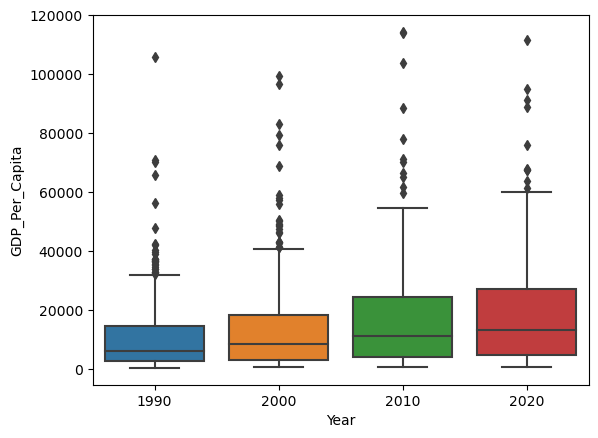

In [25]:
sns.boxplot( x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"] )

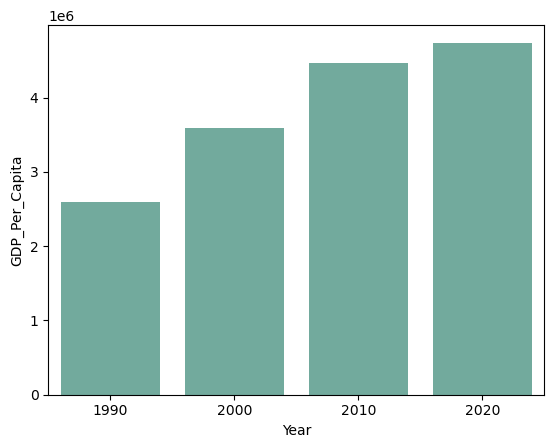

In [26]:
sns.barplot(
    y="GDP_Per_Capita",
    x="Year",
    data=gdp_decades,
    estimator=sum, 
    errorbar=None, 
    color='#69b3a2');

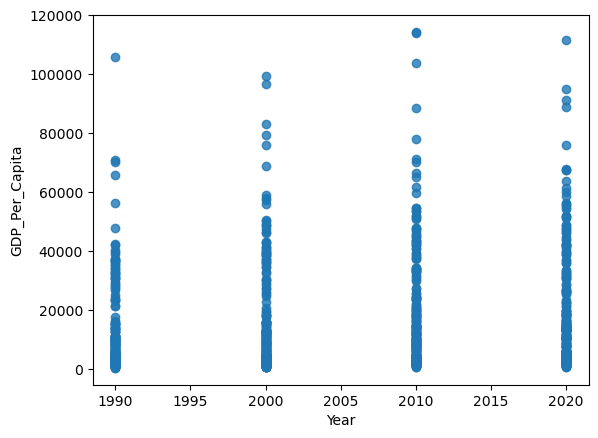

In [27]:
sns.regplot(
    x=gdp_decades["Year"],
    y=gdp_decades["GDP_Per_Capita"],
    fit_reg=False
)
plt.show()

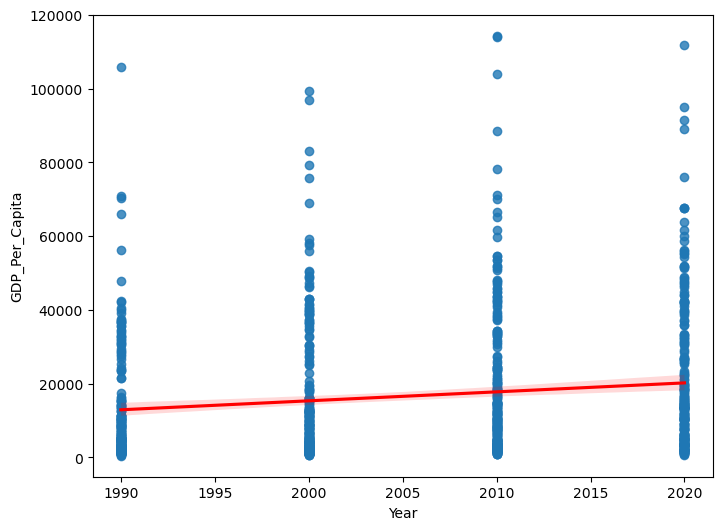

In [28]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.regplot(
    x=gdp_decades["Year"],
    y=gdp_decades["GDP_Per_Capita"],
    line_kws={"color": "r"},
    ax=ax
)
plt.show()

# Q11 Which country was the first to have a GDP per capita greater than $100,000?

In [29]:
gdp_df_clean

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111
...,...,...,...
7657,Zimbabwe,1994,2670.106615
7658,Zimbabwe,1993,2458.783255
7659,Zimbabwe,1992,2468.278257
7660,Zimbabwe,1991,2781.787843


In [30]:
gdp_df_big_capita = gdp_df_clean[gdp_df_clean["GDP_Per_Capita"] > 100000]

In [31]:
gdp_df_big_capita.loc[gdp_df_big_capita["Year"].idxmin()]

Country           United Arab Emirates
Year                              1990
GDP_Per_Capita           105893.626059
Name: 7302, dtype: object

# Q12 Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [32]:
gdp_2020.loc[gdp_2020["GDP_Per_Capita"].idxmax()]

Country              Luxembourg
Year                       2020
GDP_Per_Capita    111751.314751
Name: 4148, dtype: object

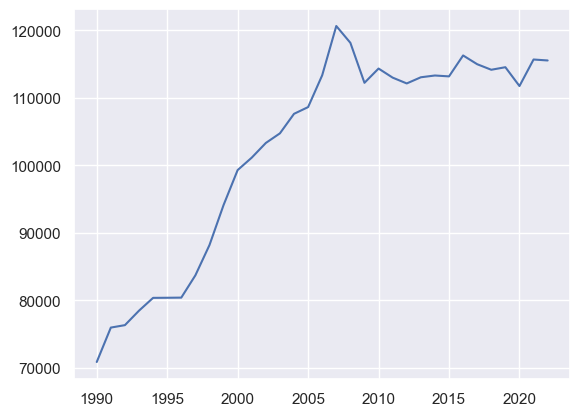

In [33]:
sns.set_theme()

# create data
gdp_plot = gdp_df_clean[gdp_df_clean["Country"] == "Luxembourg"]
 
# use the plot function
plt.plot(gdp_plot["Year"], gdp_plot["GDP_Per_Capita"])

# show the graph
plt.show()

# Q13 Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. **Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

In [34]:
gdp_2020.loc[gdp_2020["GDP_Per_Capita"].idxmin()]

Country              Burundi
Year                    2020
GDP_Per_Capita    711.355263
Name: 973, dtype: object

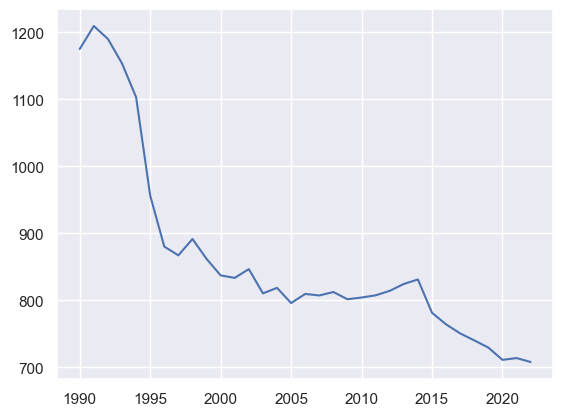

In [35]:
sns.set_theme()

# create data
gdp_plot = gdp_df_clean[gdp_df_clean["Country"] == "Burundi"]
 
# use the plot function
plt.plot(gdp_plot["Year"], gdp_plot["GDP_Per_Capita"])

# show the graph
plt.show()

# Q14 Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

In [36]:
internet_df = pd.read_csv('../data/internet_use.csv.', nrows=4495)

In [37]:
internet_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN
...,...,...,...,...
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN


# Q15 Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [38]:
internet_df_less = internet_df.drop('Value Footnotes', axis=1)

In [39]:
internet_df_clean = internet_df_less.rename(columns={'Country or Area': 'Country', 'Value': 'Internet_Users_Pct'})

In [40]:
internet_df_clean

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000
...,...,...,...
4490,Zimbabwe,1997,0.033080
4491,Zimbabwe,1996,0.016790
4492,Zimbabwe,1995,0.007684
4493,Zimbabwe,1994,0.001739


# Q16 Look at the number of observations in this dataset per year. What do you notice?

In [47]:
internet_df_clean.groupby('Year').count()

,Country,Internet_Users_Pct
Year,,
1960,7,7
1965,7,7
1970,7,7
1975,7,7
1976,7,7
1977,7,7
1978,7,7
1979,7,7
1980,7,7


In [41]:
internet_df_clean.groupby('Year')['Country'].count().sort_index()

Year
1960      7
1965      7
1970      7
1975      7
1976      7
1977      7
1978      7
1979      7
1980      7
1981      7
1982      7
1983      7
1984      7
1985      7
1986      7
1987      7
1988      7
1989      8
1990    210
1991     39
1992     50
1993     65
1994     91
1995    138
1996    175
1997    184
1998    190
1999    198
2000    199
2001    201
2002    202
2003    196
2004    199
2005    201
2006    200
2007    206
2008    204
2009    203
2010    203
2011    207
2012    203
2013    202
2014    202
Name: Country, dtype: int64

In [42]:
internet_df_clean['Year'].value_counts().head(43)

Year
1990    210
2011    207
2007    206
2008    204
2012    203
2010    203
2009    203
2014    202
2013    202
2002    202
2005    201
2001    201
2006    200
2000    199
2004    199
1999    198
2003    196
1998    190
1997    184
1996    175
1995    138
1994     91
1993     65
1992     50
1991     39
1989      8
1980      7
1965      7
1970      7
1975      7
1976      7
1977      7
1978      7
1979      7
1982      7
1981      7
1983      7
1984      7
1985      7
1986      7
1987      7
1988      7
1960      7
Name: count, dtype: int64

In [43]:
internet_df_clean['Year'].agg(['min', 'max'])

min    1960
max    2014
Name: Year, dtype: int64

# Q17 What is the first year to have a non-zero internet users percentage value?

<Axes: xlabel='Year', ylabel='Count'>

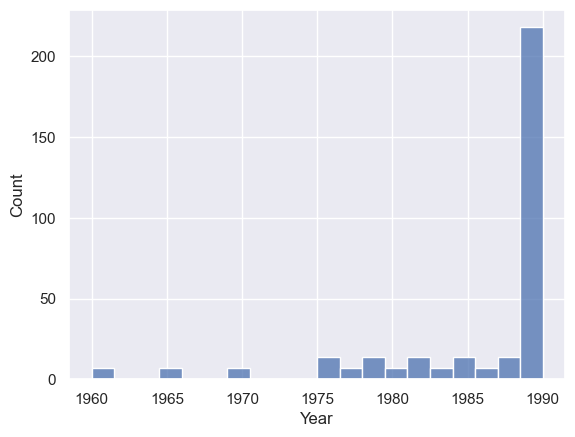

In [44]:
sns.histplot(internet_df_clean['Year'], binrange=(1960,1990), bins=20)

In [48]:
internet_non_zero = internet_df_clean[internet_df_clean['Internet_Users_Pct'] != 0]
internet_non_zero.loc[internet_non_zero['Year'].idxmin()]['Year']

1990

# Q18 How does the distribution of internet users percent differ for 2000 and 2014?

<Axes: xlabel='Year', ylabel='Internet_Users_Pct'>

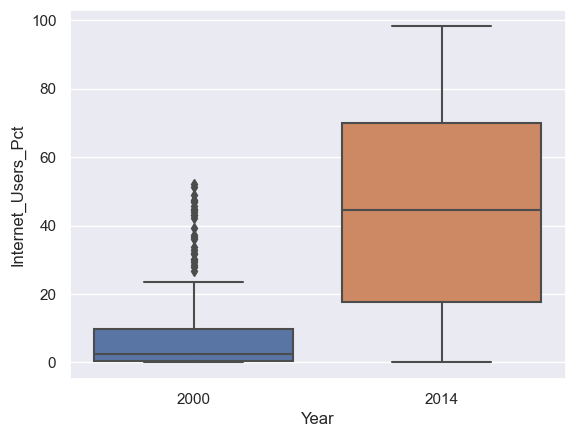

In [49]:
df_2000_2014 = internet_df_clean[(internet_df_clean['Year'] == 2000) | (internet_df_clean['Year'] == 2014)]
sns.boxplot(data=df_2000_2014, x='Year', y='Internet_Users_Pct')

# Q19 For how many countries was the percentage of internet users below 5% in 2014?

In [50]:
countries_below5_2014 = internet_df_clean[(internet_df_clean['Year'] == 2014) & (internet_df_clean['Internet_Users_Pct'] < 5)]

In [52]:
count_countries_below5_2014 = countries_below5_2014['Country'].nunique()

In [55]:
countries_below5_2014

,Country,Year,Internet_Users_Pct
623,Burundi,2014,1.38
762,Central African Rep.,2014,4.03
782,Chad,2014,2.50
909,Congo (Democratic Republic of the),2014,3.00
1065,Dem. People's Rep. of Korea,2014,0.00
1256,Eritrea,2014,0.99
1299,Ethiopia,2014,2.90
1720,Guinea,2014,1.72
1742,Guinea-Bissau,2014,3.32
2453,Madagascar,2014,3.70


In [54]:
count_countries_below5_2014

16

# Q20 Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`. Look at the first and last few rows to confirm that it merged correctly.

In [62]:
gdp_and_internet_use = pd.concat([gdp_df_clean, internet_df_clean])
gdp_and_internet_use

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN
...,...,...,...,...
4490,Zimbabwe,1997,NaN,0.033080
4491,Zimbabwe,1996,NaN,0.016790
4492,Zimbabwe,1995,NaN,0.007684
4493,Zimbabwe,1994,NaN,0.001739


In [65]:
gdp_df_clean.shape[0] + internet_df_clean.shape[0]

12157

In [66]:
gdp_and_internet_use.shape[0]

12157

# Q21 Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?

In [79]:
top3_2014 = (gdp_and_internet_use[gdp_and_internet_use["Year"] == 2014].nlargest(3, ["Internet_Users_Pct"]))

In [80]:
top3_all = gdp_df_clean[gdp_df_clean.Country.isin(top3_2014.Country)]
top3_all

,Country,Year,GDP_Per_Capita
679,Bermuda,2022,81165.650944
680,Bermuda,2021,78570.489515
681,Bermuda,2020,76117.804744
682,Bermuda,2019,81681.726668
683,Bermuda,2018,81423.408453
...,...,...,...
5232,Norway,1994,47728.440232
5233,Norway,1993,45691.162079
5234,Norway,1992,44692.360963
5235,Norway,1991,43399.755863


C:\Users\timot\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


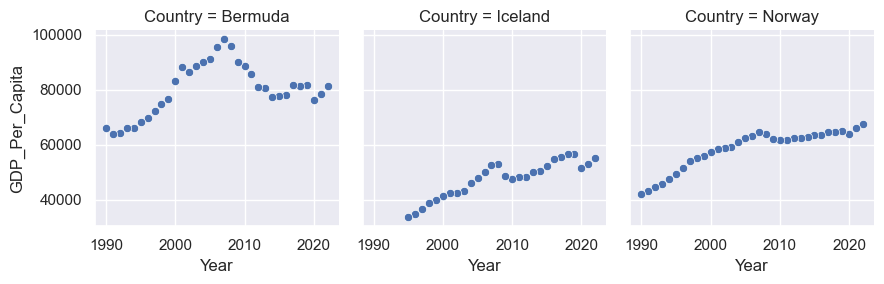

In [84]:
g = sns.FacetGrid(top3_all, col="Country")
g.map(sns.scatterplot, "Year", "GDP_Per_Capita")

# Q22 Subset `gdp_and_internet_use` to just the year 2014. Save this as a new dataframe named `gdp_and_internet_use_2014`.

# Q23 Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them.

# Q24 **Stretch Question:** Use the `qcut` function from pandas (https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) to divide countries in `gdp_per_capita_2014` into three groups based on their GDP per capita values. Label these groups as "Low", "Medium", and "High". Put these labels in a new column, named "GDP_group".

# Q25 **Stretch Question:** How does the median internet users percentage compare for the three gdp groups?